In [1]:
from pathlib import Path
from pathlib import Path
from birdclef.workflows.evaluation import load_motif_audio
from birdclef.models.embedding.tilenet import TileNet
import pandas as pd

model_path = Path("../data/processed/anikethRuns")
all_checkpoints = list(model_path.glob("checkpoints*/**/*ckpt"))
checkpoints = []
for i in [128, 256, 512]:
    checkpoints.append((i, [x for x in all_checkpoints if str(i) in x.as_posix()][-1]))


root = Path("../data/raw/birdclef-2022")
df = pd.read_parquet("../data/processed/2022-04-03-motif-consolidated.parquet")
df["species"] = df.source_name.apply(lambda x: x.split("/")[1])

species = ["brnowl", "skylar", "houfin"]
k = 250

dim, checkpoint = checkpoints[-1]
model = TileNet.load_from_checkpoint(checkpoint, z_dim=dim)
data, labels = load_motif_audio(root, df, species, num_sample=k)

f:\kaggle\birdclef-2022\venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


STFT kernels created, time used = 0.2915 seconds
STFT filter created, time used = 0.0040 seconds
Mel filter created, time used = 0.0040 seconds


perplexity: 10


f:\kaggle\birdclef-2022\venv\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
f:\kaggle\birdclef-2022\venv\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


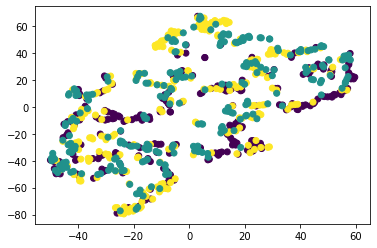

perplexity: 20


f:\kaggle\birdclef-2022\venv\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
f:\kaggle\birdclef-2022\venv\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


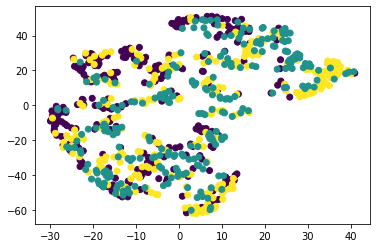

perplexity: 30


f:\kaggle\birdclef-2022\venv\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
f:\kaggle\birdclef-2022\venv\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


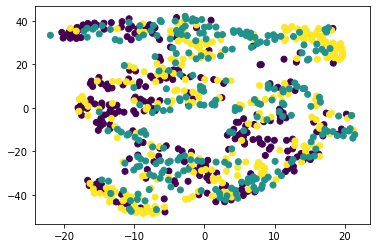

perplexity: 40


f:\kaggle\birdclef-2022\venv\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
f:\kaggle\birdclef-2022\venv\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


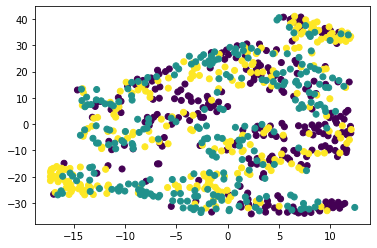

perplexity: 50


f:\kaggle\birdclef-2022\venv\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
f:\kaggle\birdclef-2022\venv\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


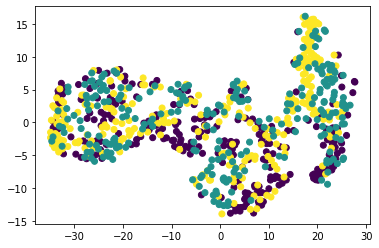

In [5]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import torch
import numpy as np

le = LabelEncoder().fit(labels)
emb = model(torch.from_numpy(np.array(data))).detach().numpy()
for i in range(10, 55, 10):
    print(f"perplexity: {i}")
    g = TSNE(n_components=2, perplexity=i).fit_transform(emb)
    plt.scatter(g[:, 0], g[:, 1], c=le.transform(labels))
    plt.show()